<a href="https://colab.research.google.com/github/Kaizzen42/pandas_exercises/blob/main/PyTorchDL_Practice_Assignment_Airbnb_Recos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn

import math, os, sys, glob



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
search = pd.read_csv('/content/drive/MyDrive/Dataset/bookings_sample.csv')
search

,id_search,label,id_user,id_listing,ds_search,ds_book,ds_contact,query_market,query_checkin,query_checkout,...,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights
0,1d320d4d-4826-42b6-9ebe-97d8f2adc543,impression,e566365a0638690cc6572c40e99729ac,6f6d6ba9c29e63a1fdb85742a598b5b5,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.787234,14.0,0.735546,1,0,52.752133,0.902703,1.001322,1.0,1125.0
1,94f40f5e-5d7c-4593-b745-220c8db1070d,impression,e566365a0638690cc6572c40e99729ac,15eaa0a653431dfb2c80e3e031866e49,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,5.000000,NaN,0.625522,0,0,54.973157,1.000613,1.000300,2.0,30.0
2,e9649afc-d30a-4b77-bb0a-8cfd5c3423ea,impression,e566365a0638690cc6572c40e99729ac,69a48538dedb0975b59feaa6ba38567a,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.873563,12.0,NaN,1,1,39.465325,0.851500,0.920734,1.0,1120.0
3,75c98fbc-84e9-4dde-b882-87f9985d1942,impression,e566365a0638690cc6572c40e99729ac,79b9a8296d922ad4ebbd44c511049b90,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.714286,5.0,0.073634,1,1,39.827413,0.643434,0.951680,4.0,6.0
4,11886a08-c9da-4b41-98cd-8d4109a35779,impression,e566365a0638690cc6572c40e99729ac,cc68e4db29988e237131d93e022d7316,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,5.000000,0.0,0.005806,0,0,47.557220,NaN,NaN,3.0,1125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177583,c4aa1ca6-b374-4829-9ea8-2b7495f19c49,click,f99499cdc24746a2085a2868decf23b8,d9c26ad33ab9ba17fc5f408352402826,11/26/18,NaN,NaN,City B,11/28/18,12/10/18,...,-1.000000,NaN,0.007209,0,0,NaN,NaN,NaN,4.0,1125.0
177584,c1f1a02d-cac1-4d77-b7a2-c387e140aed8,impression,f99499cdc24746a2085a2868decf23b8,0e56177c4f6478bb781373842b655975,11/26/18,NaN,NaN,City B,11/28/18,12/11/18,...,-1.000000,0.0,0.000000,0,0,NaN,NaN,NaN,1.0,1125.0
177585,497ef8f3-e6c3-4a94-b817-3625583c11a0,impression,f99499cdc24746a2085a2868decf23b8,207da3dad3492e5fc366278a0c489053,11/26/18,NaN,NaN,City B,11/29/18,12/10/18,...,5.000000,NaN,0.889745,0,0,34.038969,NaN,NaN,1.0,1125.0
177586,497ef8f3-e6c3-4a94-b817-3625583c11a0,impression,f99499cdc24746a2085a2868decf23b8,297925bb4305c5de1cf665b4c552b596,11/26/18,NaN,NaN,City B,11/29/18,12/10/18,...,5.000000,2.0,NaN,1,1,20.856145,0.921169,0.950572,1.0,1125.0


In [5]:
print(search.shape)
search.head(5)

(177588, 48)


,id_search,label,id_user,id_listing,ds_search,ds_book,ds_contact,query_market,query_checkin,query_checkout,...,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights
0,1d320d4d-4826-42b6-9ebe-97d8f2adc543,impression,e566365a0638690cc6572c40e99729ac,6f6d6ba9c29e63a1fdb85742a598b5b5,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.787234,14.0,0.735546,1,0,52.752133,0.902703,1.001322,1.0,1125.0
1,94f40f5e-5d7c-4593-b745-220c8db1070d,impression,e566365a0638690cc6572c40e99729ac,15eaa0a653431dfb2c80e3e031866e49,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,5.000000,NaN,0.625522,0,0,54.973157,1.000613,1.000300,2.0,30.0
2,e9649afc-d30a-4b77-bb0a-8cfd5c3423ea,impression,e566365a0638690cc6572c40e99729ac,69a48538dedb0975b59feaa6ba38567a,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.873563,12.0,NaN,1,1,39.465325,0.851500,0.920734,1.0,1120.0
3,75c98fbc-84e9-4dde-b882-87f9985d1942,impression,e566365a0638690cc6572c40e99729ac,79b9a8296d922ad4ebbd44c511049b90,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.714286,5.0,0.073634,1,1,39.827413,0.643434,0.951680,4.0,6.0
4,11886a08-c9da-4b41-98cd-8d4109a35779,impression,e566365a0638690cc6572c40e99729ac,cc68e4db29988e237131d93e022d7316,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,5.000000,0.0,0.005806,0,0,47.557220,NaN,NaN,3.0,1125.0


In [6]:
search.label.value_counts()

label
impression      130031
click            42251
host_contact      3066
book              2240
Name: count, dtype: int64

In [7]:
# Given a user_id and a listing_id, what is the probability of the user booking the listing?
search['booked'] = np.where(search['label']=="book", True, False)

In [8]:
search.columns

Index(['id_search', 'label', 'id_user', 'id_listing', 'ds_search', 'ds_book',
       'ds_contact', 'query_market', 'query_checkin', 'query_checkout',
       'query_num_guests', 'query_num_children', 'query_num_infants',
       'query_radius', 'query_price_max', 'query_price_min',
       'query_center_lat', 'query_center_lng', 'listing_is_new',
       'listing_total_price', 'listing_instant_bookable', 'listing_lat',
       'listing_lng', 'listing_review_rating', 'listing_review_count',
       'listing_property_type', 'listing_room_type', 'listing_num_beds',
       'listing_num_bedrooms', 'listing_num_bathrooms',
       'listing_person_capacity', 'listing_has_pro_pictures',
       'listing_num_recent_reservations', 'listing_location_rating',
       'listing_cleanliness_rating', 'listing_checkin_rating',
       'listing_value_rating', 'listing_communication_rating',
       'listing_accuracy_rating', 'listing_num_books_90day',
       'listing_occupancy_rate', 'listing_monthly_discount',
  

In [9]:
baseline_raw_features = [ 'query_checkin', 'query_checkout',
       'query_num_guests', 'query_radius', 'query_price_max',
       'listing_total_price', 'listing_instant_bookable', 'listing_review_rating', 'listing_review_count',
       'listing_num_bathrooms','listing_person_capacity', 'listing_cleaning_fee']
baseline_target = ['booked']

In [10]:
search['lat_diff'] = np.abs(search['query_center_lat'] - search['listing_lat'])
search['lon_diff'] = np.abs(search['query_center_lng'] - search['listing_lng'])

In [11]:
feature_columns = baseline_raw_features + ['lat_diff', 'lon_diff']
feature_columns

['query_checkin',
 'query_checkout',
 'query_num_guests',
 'query_radius',
 'query_price_max',
 'listing_total_price',
 'listing_instant_bookable',
 'listing_review_rating',
 'listing_review_count',
 'listing_num_bathrooms',
 'listing_person_capacity',
 'listing_cleaning_fee',
 'lat_diff',
 'lon_diff']

In [12]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(search[['query_market']])
# encoded_data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data)
reduced_df = pd.DataFrame(reduced_data, columns = ['city_pca1', 'city_pca2'])
# reduced_df
search_reduced = pd.concat([search[feature_columns+baseline_target], reduced_df], axis = 1)
search_reduced

,query_checkin,query_checkout,query_num_guests,query_radius,query_price_max,listing_total_price,listing_instant_bookable,listing_review_rating,listing_review_count,listing_num_bathrooms,listing_person_capacity,listing_cleaning_fee,lat_diff,lon_diff,booked,city_pca1,city_pca2
0,4/24/19,4/29/19,2,2.457496,-1.000000e+00,328.000449,True,4.729166,48.0,1.0,4,52.752133,0.00,0.00,False,-0.351570,1.443614e-13
1,4/24/19,4/29/19,2,0.760868,-1.000000e+00,238.389247,False,4.940299,67.0,2.0,6,54.973157,0.00,0.00,False,-0.351570,-8.055534e-18
2,4/24/19,4/29/19,2,1.136508,-1.000000e+00,232.724301,True,NaN,86.0,1.5,5,39.465325,0.00,0.00,False,-0.351570,-8.055534e-18
3,4/24/19,4/29/19,2,2.920531,-1.000000e+00,NaN,False,4.642857,14.0,1.0,4,39.827413,0.00,0.00,False,-0.351570,-8.055534e-18
4,4/24/19,4/29/19,2,1.906487,-1.000000e+00,372.335536,False,5.000000,1.0,1.0,3,47.557220,0.00,0.00,False,-0.351570,-8.055534e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177583,11/28/18,12/10/18,1,27.251149,-1.000000e+00,324.884568,True,0.000000,NaN,2.0,2,NaN,0.00,0.02,False,1.062643,-6.970163e-18
177584,11/28/18,12/11/18,2,23.604367,1.070000e+09,14567.516393,True,0.000000,0.0,2.0,4,NaN,0.00,0.02,False,1.062643,-4.522436e-17
177585,11/29/18,12/10/18,2,25.267126,-1.000000e+00,574.930821,True,5.000000,4.0,1.0,4,34.038969,0.00,0.07,False,1.062643,-4.522436e-17
177586,11/29/18,12/10/18,2,25.740712,-1.000000e+00,427.397419,True,5.000000,1.0,1.0,4,20.856145,0.02,0.02,False,1.062643,-4.522436e-17


In [13]:
search.dtypes

id_search                           object
label                               object
id_user                             object
id_listing                          object
ds_search                           object
ds_book                             object
ds_contact                          object
query_market                        object
query_checkin                       object
query_checkout                      object
query_num_guests                     int64
query_num_children                   int64
query_num_infants                    int64
query_radius                       float64
query_price_max                    float64
query_price_min                      int64
query_center_lat                   float64
query_center_lng                   float64
listing_is_new                       int64
listing_total_price                float64
listing_instant_bookable              bool
listing_lat                        float64
listing_lng                        float64
listing_rev

## Data Preprocessing

In [14]:
search_reduced['query_checkin'] =  pd.to_datetime(search_reduced['query_checkin'])
search_reduced['query_checkout'] = pd.to_datetime(search_reduced['query_checkout'])
search_reduced.dtypes
search_reduced['stay_duration'] = search_reduced['query_checkout'] - search_reduced['query_checkin']
search_reduced['stay_duration'] = search_reduced['stay_duration'].dt.days
search_reduced['listing_instant_bookable'] = np.where(search_reduced['listing_instant_bookable']==True, 1.0, 0.0)
search_reduced[['listing_total_price','listing_review_rating','listing_cleaning_fee']] = search_reduced[['listing_total_price','listing_review_rating','listing_cleaning_fee']].apply(lambda x: np.round(x, 3), axis=1)
search_features = search_reduced.drop(['query_checkin','query_checkout'], axis=1)
search_features.head()

<ipython-input-14-646cb28efe8a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  search_reduced['query_checkin'] =  pd.to_datetime(search_reduced['query_checkin'])
<ipython-input-14-646cb28efe8a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  search_reduced['query_checkout'] = pd.to_datetime(search_reduced['query_checkout'])


,query_num_guests,query_radius,query_price_max,listing_total_price,listing_instant_bookable,listing_review_rating,listing_review_count,listing_num_bathrooms,listing_person_capacity,listing_cleaning_fee,lat_diff,lon_diff,booked,city_pca1,city_pca2,stay_duration
0,2,2.457496,-1.0,328.000,1.0,4.729,48.0,1.0,4,52.752,0.0,0.0,False,-0.35157,1.443614e-13,5
1,2,0.760868,-1.0,238.389,0.0,4.940,67.0,2.0,6,54.973,0.0,0.0,False,-0.35157,-8.055534e-18,5
2,2,1.136508,-1.0,232.724,1.0,NaN,86.0,1.5,5,39.465,0.0,0.0,False,-0.35157,-8.055534e-18,5
3,2,2.920531,-1.0,NaN,0.0,4.643,14.0,1.0,4,39.827,0.0,0.0,False,-0.35157,-8.055534e-18,5
4,2,1.906487,-1.0,372.336,0.0,5.000,1.0,1.0,3,47.557,0.0,0.0,False,-0.35157,-8.055534e-18,5


In [15]:
search_features.dtypes

query_num_guests              int64
query_radius                float64
query_price_max             float64
listing_total_price         float64
listing_instant_bookable    float64
listing_review_rating       float64
listing_review_count        float64
listing_num_bathrooms       float64
listing_person_capacity       int64
listing_cleaning_fee        float64
lat_diff                    float64
lon_diff                    float64
booked                         bool
city_pca1                   float64
city_pca2                   float64
stay_duration                 int64
dtype: object

## Deal with Missing Values

In [16]:
search_features.isna().sum()

query_num_guests                0
query_radius                    0
query_price_max                 0
listing_total_price          9021
listing_instant_bookable        0
listing_review_rating       21382
listing_review_count        17533
listing_num_bathrooms        9141
listing_person_capacity         0
listing_cleaning_fee        45052
lat_diff                        0
lon_diff                        0
booked                          0
city_pca1                       0
city_pca2                       0
stay_duration                   0
dtype: int64

In [17]:
search_features['listing_total_price'].fillna(search_features['listing_total_price'].max(), inplace=True)
search_features['listing_review_rating'].fillna(search_features['listing_review_rating'].median(), inplace=True)  # Median value
search_features['listing_review_count'].fillna(0, inplace=True)  # Fill with 0
search_features['listing_num_bathrooms'].fillna(0, inplace=True)  # Forward fill
search_features['listing_cleaning_fee'].fillna(search_features['listing_cleaning_fee'].max(), inplace=True)  # Mode value

In [18]:
search_features.isna().sum()

query_num_guests            0
query_radius                0
query_price_max             0
listing_total_price         0
listing_instant_bookable    0
listing_review_rating       0
listing_review_count        0
listing_num_bathrooms       0
listing_person_capacity     0
listing_cleaning_fee        0
lat_diff                    0
lon_diff                    0
booked                      0
city_pca1                   0
city_pca2                   0
stay_duration               0
dtype: int64

In [19]:
model_features = list(search_features.columns)
model_features.remove('booked')
model_features

['query_num_guests',
 'query_radius',
 'query_price_max',
 'listing_total_price',
 'listing_instant_bookable',
 'listing_review_rating',
 'listing_review_count',
 'listing_num_bathrooms',
 'listing_person_capacity',
 'listing_cleaning_fee',
 'lat_diff',
 'lon_diff',
 'city_pca1',
 'city_pca2',
 'stay_duration']

In [20]:
plot_data_booked = search_features[model_features+baseline_target].sample(10000, replace=True, random_state=42)
plot_data_booked

,query_num_guests,query_radius,query_price_max,listing_total_price,listing_instant_bookable,listing_review_rating,listing_review_count,listing_num_bathrooms,listing_person_capacity,listing_cleaning_fee,lat_diff,lon_diff,city_pca1,city_pca2,stay_duration,booked
121958,2,1.629401,3.300000e+01,17.173,1.0,0.000,0.0,1.0,4,799.821,0.02,0.01,1.062643,-6.970163e-18,2,False
146867,1,26.610035,-1.000000e+00,55.924,1.0,4.951,83.0,1.0,2,0.476,0.02,0.04,1.062643,-6.970163e-18,1,False
131932,2,49.609631,1.070000e+09,2944.974,0.0,4.720,7.0,2.0,6,39.859,0.05,0.05,1.062643,-6.970163e-18,14,False
103694,1,1.060129,-1.000000e+00,108.149,1.0,5.000,2.0,2.0,2,26.142,0.01,0.00,1.062643,-6.970163e-18,3,False
119879,4,1.515191,6.800000e+01,194.456,0.0,5.000,3.0,0.0,4,40.198,0.00,0.01,-0.351570,-8.055534e-18,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121292,1,25.253331,-1.000000e+00,1004.146,0.0,4.857,7.0,2.0,4,799.821,0.01,0.02,1.062643,-6.970163e-18,27,False
90570,2,0.318126,-1.000000e+00,137.131,0.0,4.895,19.0,1.0,4,39.728,0.00,0.00,-0.351570,-8.055534e-18,2,False
123791,6,0.000000,7.900000e+01,545.736,0.0,4.815,216.0,2.0,6,51.235,0.00,0.00,-0.351570,-8.055534e-18,8,False
125291,2,1.501960,1.040000e+02,617.375,0.0,0.000,0.0,1.0,2,799.821,0.00,0.01,-0.351570,-8.055534e-18,6,False


In [21]:
# correlation_matrix = plot_data_booked.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

## Next, we build the dataset and dataloader objects

In [22]:
from sklearn.model_selection import train_test_split

X = search_features[model_features]
Y = search_features[baseline_target]

print(f"{X.shape=} {Y.shape=}")

X_train_val, X_test, Y_train_val , Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# X_train_val.shape
# Y_train_val.shape
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32)

print(f"Shapes ==> {X_train_tensor.shape=}  \
{Y_train_tensor.shape} \
{X_val_tensor.shape} \
{Y_val_tensor.shape} \
{X_test_tensor.shape} \
{Y_test_tensor.shape} ")

X.shape=(177588, 15) Y.shape=(177588, 1)
Shapes ==> X_train_tensor.shape=torch.Size([113656, 15])  torch.Size([113656, 1]) torch.Size([28414, 15]) torch.Size([28414, 1]) torch.Size([35518, 15]) torch.Size([35518, 1]) 


In [67]:
from torch.utils.data import DataLoader, TensorDataset

BATCH_SIZE = 256

# Create Datasets
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_dataloader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle=False)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle=False)

In [68]:
import torch.optim as optim
import torch.nn as nn


# class ListingRecommender(nn.Module):
#   def __init__(self, input_dim, output_dim):
#     super(ListingRecommender, self).__init__()
#     self.layer1 = nn.Linear(input_dim, input_dim*4)
#     self.layer2 = nn.Linear(input_dim*4, input_dim*4)
#     self.layer3 = nn.Linear(input_dim*4, input_dim)
#     self.out = nn.Linear(input_dim, output_dim)
#     self.relu = nn.LeakyReLU(negative_slope=0.1)
#     self.sigmoid = nn.Sigmoid()

#   def forward(self, x):
#     x1 = self.relu(self.layer1(x))
#     x2 = self.relu(self.layer2(x1))
#     x3 = self.relu(self.layer3(x2))
#     x4 = self.out(x3)
#     return self.sigmoid(x4)

class ListingRecommender(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ListingRecommender, self).__init__()
        self.layer1 = nn.Linear(input_dim, input_dim * 4)
        self.bn1 = nn.BatchNorm1d(input_dim * 4)
        self.layer2 = nn.Linear(input_dim * 4, input_dim * 4)
        self.bn2 = nn.BatchNorm1d(input_dim * 4)
        self.layer3 = nn.Linear(input_dim * 4, input_dim)
        self.bn3 = nn.BatchNorm1d(input_dim)
        self.out = nn.Linear(input_dim, output_dim)
        self.relu = nn.LeakyReLU(negative_slope=0.1)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.bn1(self.layer1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.layer2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.layer3(x)))
        x = self.out(x)
        return self.sigmoid(x)

input_dim, output_dim = len(model_features), 1
model = ListingRecommender(input_dim, output_dim)

learning_rate = 0.0001
num_epochs = 30

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [69]:
len(train_dataloader)

444

In [70]:
# Training Loop
training_losses, val_losses = [], []
device = "cpu"#torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}\n")

model = model.to(device)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x_batch, y_batch in train_dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_training_loss_epoch = running_loss/len(train_dataloader)
    training_losses.append(avg_training_loss_epoch)

    model.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for x_batch, y_batch in val_dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_preds = model(x_batch)
            loss = criterion(y_preds, y_batch)
            running_loss_val += loss.item()
        avg_val_loss_epoch = running_loss_val/len(val_dataloader)
        val_losses.append(avg_val_loss_epoch)

    print(f"Epoch: {epoch}, Training Loss:{avg_training_loss_epoch:.2f}, Validation Loss: {avg_val_loss_epoch:.2f}")



Using device cpu

Epoch: 0, Training Loss:0.74, Validation Loss: 0.75
Epoch: 1, Training Loss:0.59, Validation Loss: 0.64
Epoch: 2, Training Loss:0.44, Validation Loss: 0.51
Epoch: 3, Training Loss:0.31, Validation Loss: 0.39
Epoch: 4, Training Loss:0.22, Validation Loss: 0.31
Epoch: 5, Training Loss:0.16, Validation Loss: 0.24
Epoch: 6, Training Loss:0.12, Validation Loss: 0.19
Epoch: 7, Training Loss:0.10, Validation Loss: 0.16
Epoch: 8, Training Loss:0.09, Validation Loss: 0.13
Epoch: 9, Training Loss:0.08, Validation Loss: 0.12
Epoch: 10, Training Loss:0.07, Validation Loss: 0.11
Epoch: 11, Training Loss:0.07, Validation Loss: 0.10
Epoch: 12, Training Loss:0.07, Validation Loss: 0.09
Epoch: 13, Training Loss:0.07, Validation Loss: 0.09
Epoch: 14, Training Loss:0.07, Validation Loss: 0.09
Epoch: 15, Training Loss:0.07, Validation Loss: 0.09
Epoch: 16, Training Loss:0.07, Validation Loss: 0.08
Epoch: 17, Training Loss:0.07, Validation Loss: 0.08
Epoch: 18, Training Loss:0.07, Validat

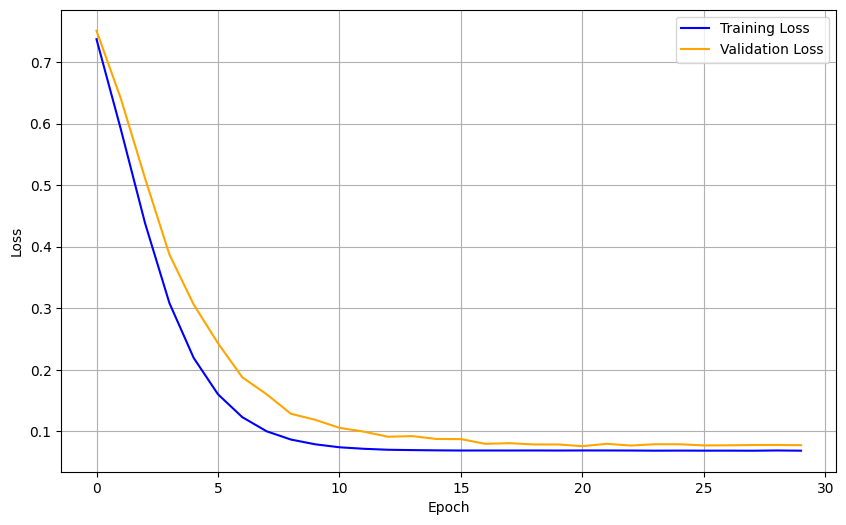

In [71]:
plt.figure(figsize=(10,6))
plt.plot(training_losses, color="blue", label="Training Loss")
plt.plot(val_losses, color="orange", label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')
plt.show()


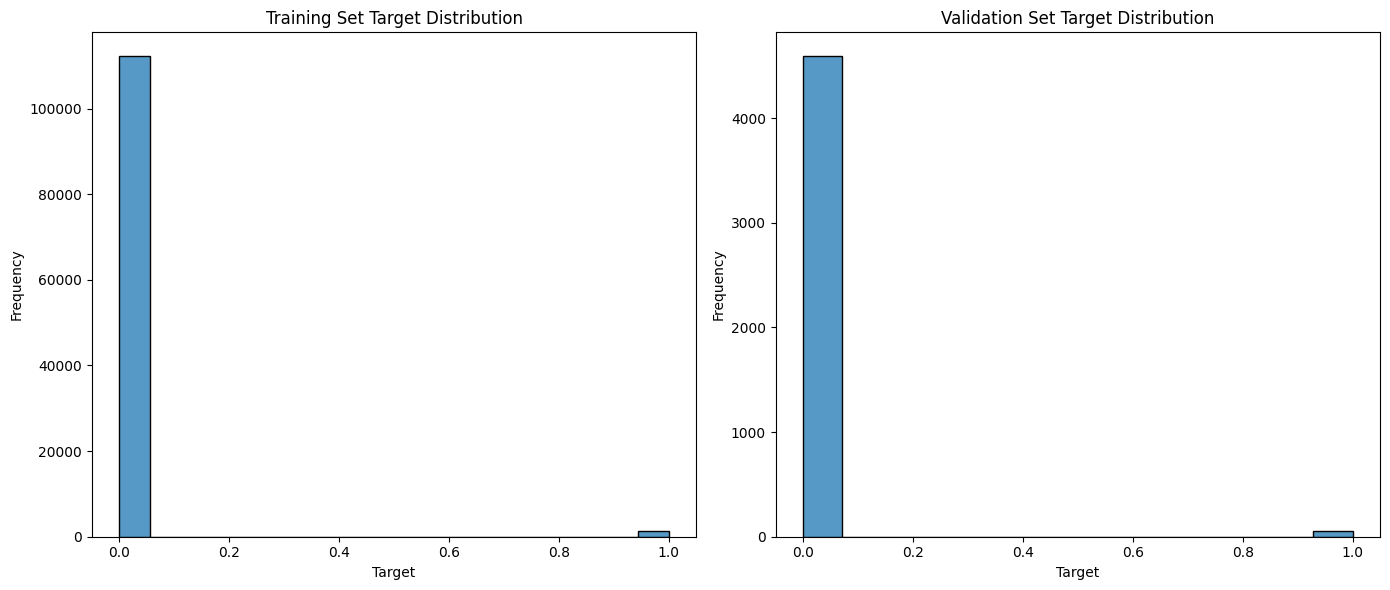

In [56]:

# Correct the shape of Y tensors
Y_train = pd.Series(Y_train_tensor.numpy().squeeze())
Y_val = pd.Series(Y_val_tensor.numpy().squeeze())
Y_test = pd.Series(Y_test_tensor.numpy().squeeze())

# Combine features and target for plotting
train_data = X_train.copy()
train_data['target'] = Y_train

val_data = X_val.copy()
val_data['target'] = Y_val

# Plot distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(train_data['target'], kde=False, ax=axs[0])
axs[0].set_title('Training Set Target Distribution')
axs[0].set_xlabel('Target')
axs[0].set_ylabel('Frequency')

sns.histplot(val_data['target'], kde=False, ax=axs[1])
axs[1].set_title('Validation Set Target Distribution')
axs[1].set_xlabel('Target')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()